# Boilerplate

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from src.libraries import *
from decision_tree import VanillaDecisionTreeClassifier
from utils import find_node_dir_val, plot_2d_grids_from_fitted_tree

# Test runs

### Toy Data

In [4]:
toy_data = pd.DataFrame({"x1": [1, 10, 432, 1, 60],
                         "x2":[2, 5, 10, 6, 6],
                         "x3":[10, 10, 10, 10, 10],
                         "y":[1, 1, 0, 0, 0],
                        })
toy_data

,x1,x2,x3,y
0,1,2,10,1
1,10,5,10,1
2,432,10,10,0
3,1,6,10,0
4,60,6,10,0


In [5]:
dt = VanillaDecisionTreeClassifier()

In [6]:
fitted_dt = dt.fit(toy_data)
fitted_dt

defaultdict(None,
            {'x2': {'feat_value': 5, 'ymean': 0.4, 'left': 1.0, 'right': 0.0}})

In [7]:
dt.predict(toy_data)

[1.0, 1.0, 0.0, 0.0, 0.0]

## Sklearn dataset - Breast Cancer

In [8]:
sklearn_data = load_breast_cancer()
X, y = sklearn_data.data, sklearn_data.target
sklearn_datadf = pd.DataFrame(X)
sklearn_datadf['y'] = y

In [9]:
# Train test split, random 75-25% splits

sklearn_datadf_train = sklearn_datadf.sample(frac=0.75, random_state=10)

test_idx = [i for i in range(len(sklearn_datadf)) if i not in sklearn_datadf_train.index]
sklearn_datadf_test = sklearn_datadf.iloc[test_idx, :]
sklearn_datadf_test.reset_index(drop=True, inplace=True)

In [10]:
sklearn_datadf.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
dt = VanillaDecisionTreeClassifier(max_depth=4, min_leaf_size=2)
fitted_dt = dt.fit(sklearn_datadf_train)

In [12]:
fitted_dt

defaultdict(None,
            {23: {'feat_value': 880.8,
              'ymean': 0.6252927400468384,
              'left': defaultdict(None,
                          {27: {'feat_value': 0.1599,
                            'ymean': 0.9131944444444444,
                            'left': defaultdict(None,
                                        {27: {'feat_value': 0.1308,
                                          'ymean': 0.9595588235294118,
                                          'left': defaultdict(None,
                                                      {10: {'feat_value': 0.6412,
                                                        'ymean': 0.9879518072289156,
                                                        'left': defaultdict(None,
                                                                    {6: {'feat_value': 0.1188,
                                                                      'ymean': 0.9959349593495935,
                                             

In [13]:
test_preds = dt.predict(sklearn_datadf_test)
train_preds = dt.predict(sklearn_datadf_train)

# Comparison with Sklearn's implementation

In [14]:
dtc = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
dtc.fit(sklearn_datadf_train.drop('y', axis=1), sklearn_datadf_train['y'])

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [15]:
test_preds_sk = dtc.predict_proba(sklearn_datadf_test.drop('y', axis=1))[:,1]

In [16]:
fprs_sk, tprs_sk, _ = roc_curve(sklearn_datadf_test['y'], test_preds_sk)
fprs, tprs, _ = roc_curve(sklearn_datadf_test['y'], test_preds)

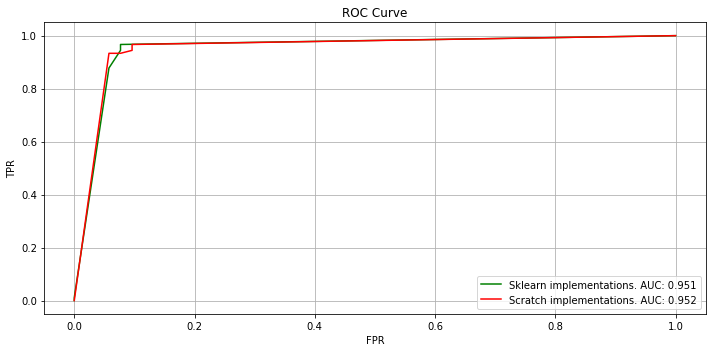

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(fprs_sk, tprs_sk, label= f'Sklearn implementations. AUC: {auc(fprs_sk, tprs_sk):0.3f}', color='g')
ax.plot(fprs, tprs, label= f'Scratch implementations. AUC: {auc(fprs, tprs):0.3f}', color='r')

ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC Curve')
ax.grid()
ax.legend()
fig.tight_layout()

The test performance is same b/w scratch and sklearn implementation

# Visualization of Decision Tree

Visualization ideas are taken from ex masters classmate Tyler's blogpost: http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.htmlm

In [18]:
sim_df = pd.DataFrame()
sim_df['x'] = np.random.uniform(0, 100, size=1000)
sim_df['y'] = np.random.uniform(0, 100, size=1000)
sim_df['class'] = 0

In [19]:
# circle #1 
xoffset = 20 # x distance of center from origin
yoffset = 20 # y distance of center from origin
r = 10 # radius

sim_df.loc[((sim_df['x'] - xoffset)**2 +\
            (sim_df['y'] - yoffset)**2) < r**2 
           , 'class'] = 1

# circle #2
xoffset = 50 # x distance of center from origin
yoffset = 80 # y distance of center from origin
r = 15 # radius

sim_df.loc[((sim_df['x'] - xoffset)**2 +\
            (sim_df['y'] - yoffset)**2) < r**2 
           , 'class'] = 1


# circle #3
xoffset = 80 # x distance of center from origin
yoffset = 20 # y distance of center from origin
r = 10 # radius

sim_df.loc[((sim_df['x'] - xoffset)**2 +\
            (sim_df['y'] - yoffset)**2) < r**2 
           , 'class'] = 1

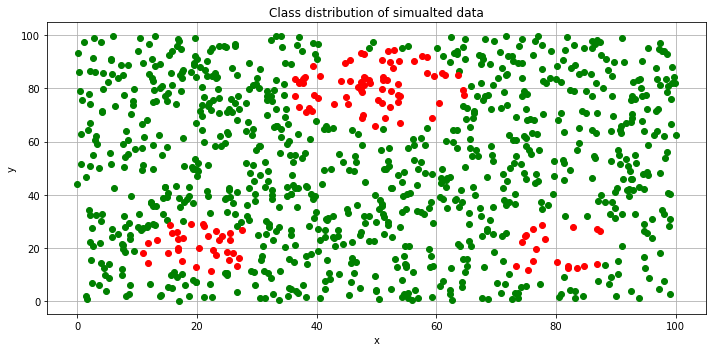

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    sim_df[sim_df['class'] == 0]['x'], 
    sim_df[sim_df['class'] == 0]['y'], 
    'o',
    color='g')
ax.plot(
    sim_df[sim_df['class'] == 1]['x'], 
    sim_df[sim_df['class'] == 1]['y'], 
    'o',
    color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Class distribution of simualted data')
ax.grid()
# ax.legend()
fig.tight_layout()

In [21]:
dt = VanillaDecisionTreeClassifier(max_depth=3, min_leaf_size=4, target='class')
fitted_dt = dt.fit(sim_df)

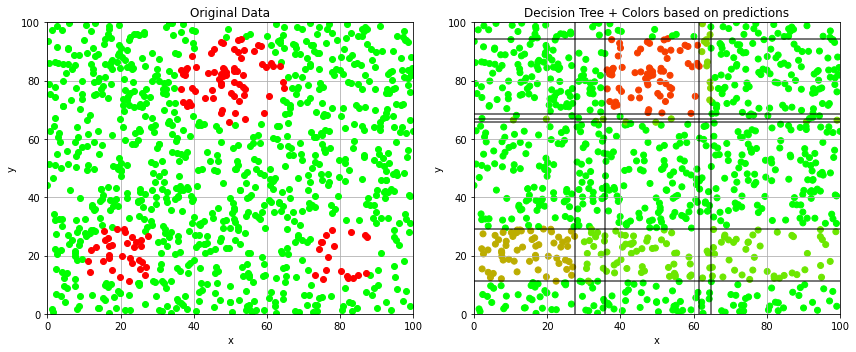

In [22]:
preds = dt.predict(sim_df)
plot_2d_grids_from_fitted_tree(fitted_dt, sim_df.copy(), preds, alpha=0.7)

# End